# **WHAT'S COOKING?**

##Using recipe ingredients to categorize the cuisines


---



In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import json
import os
import random

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly


In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
#Show data from all cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Read and show data
os.chdir("/gdrive/MyDrive/Colab_data_files/whatcooking/")
data = pd.read_json('train.json', encoding='latin')
data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [6]:
data.shape

(39774, 3)

## **Explore the target variable and Visualization**

In [7]:
print("Number of cuisine categories: {}".format(len(data.cuisine.unique())))
data.cuisine.unique()

Number of cuisine categories: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

It can be seen that there are 20 different categories (cuisines) which are going to be predicted.This implies that the problem at hand is a multi-class classification (there are more than 2 categories to predict).

In [8]:
#Function for generating colours at random
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

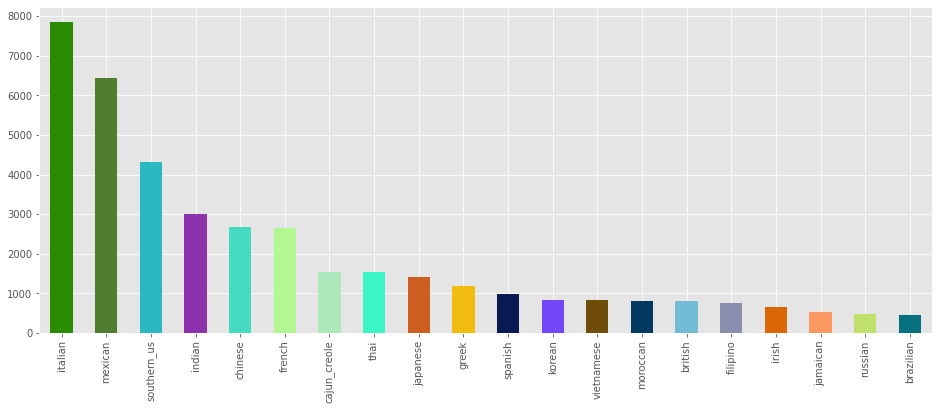

In [9]:
#Plot giving information on the number of times each cuisine is represented in the data
data['cuisine'].value_counts().plot.bar(color=random_colours(20),figsize=(16,6))

From the plot of label distribution, it is observed that the most common category in our sample is the Italian cuisine, followed by the Mexican. 

The least represented cuisines are the Irish, Jamaican, Russian and Brazilian

In [10]:
print('Maximum Number of Ingredients in a Dish: ',data['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',data['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


In [11]:
#Creating A Feature that counts the Number Of Ingredients used in a given Recipe

#no of Ingredients
data['num_ing'] = data['ingredients'].str.len()

<Figure size 1152x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



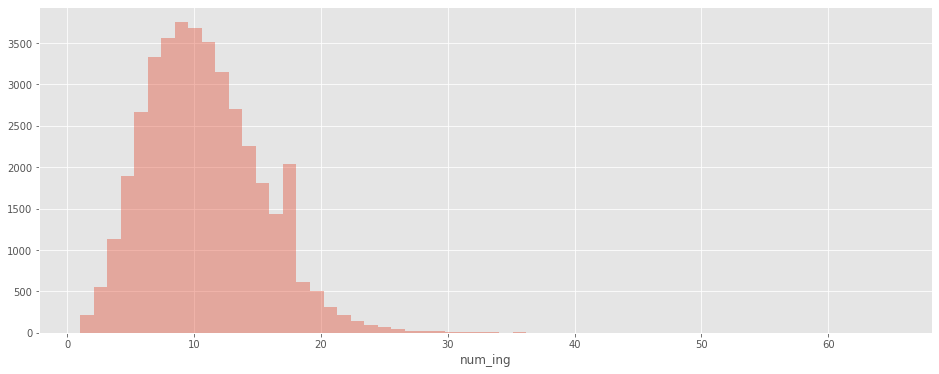

In [12]:
plt.figure(figsize=(16,6))
sns.distplot(data['num_ing'],kde =False ,bins=60)

The distribution of recipe length is right-skewed as we can see from the histogram above.

<Figure size 1152x432 with 0 Axes>

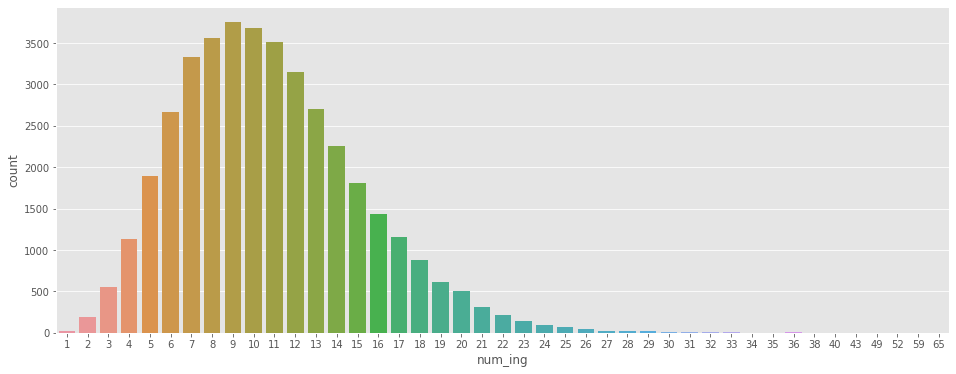

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x='num_ing',data=data)

It can be seen that recipes with only one ingredient which is very small and recipes with more than 50 ingredients which is very High.
These are outliers.

### Analysing the extremes

In [14]:
longrecip = data[data['num_ing'] > 30]
print(len(longrecip))
#40 recipes consist of more than 30 ingredients

40


In [15]:
longrecip['cuisine'].value_counts()

mexican         12
indian           5
italian          3
thai             3
brazilian        2
jamaican         2
chinese          2
southern_us      2
moroccan         2
cajun_creole     2
spanish          1
filipino         1
french           1
vietnamese       1
japanese         1
Name: cuisine, dtype: int64

In [16]:
shortrecip = data[data['num_ing']<=2]
print(len(shortrecip))
#215 recipes consist of less than or equal to 2 ingredients

215


In [17]:
shortrecip['cuisine'].value_counts()

italian         37
french          34
southern_us     23
mexican         22
indian          19
japanese        16
vietnamese      11
chinese         10
spanish          8
cajun_creole     7
korean           5
greek            4
thai             4
brazilian        3
irish            3
filipino         3
british          3
moroccan         1
jamaican         1
russian          1
Name: cuisine, dtype: int64

### Explore recipe length distribution in each cuisine

<Figure size 1440x576 with 0 Axes>

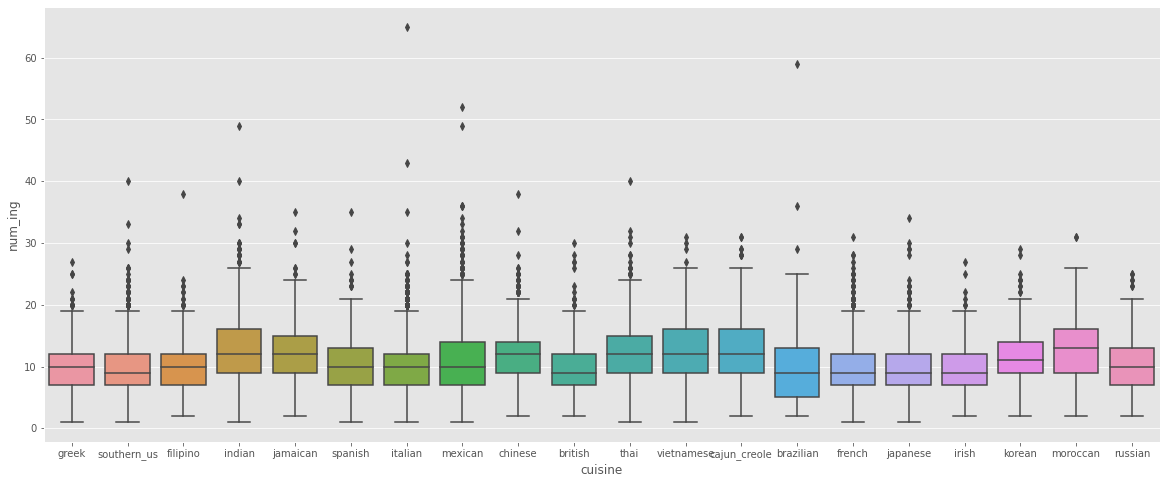

In [18]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cuisine',y='num_ing',data=data)

From the box plots of recipe length distributions, we can make several observations:



*   The Moroccan cuisine seems to have the longest recipes on average compared to all the rest cuisines in our sample
*   The opposite phenomenon is observed for for the Irish, British, French and Southern_us cuisine


*   There exist outliers in all cuisines
*   Recipes part of the European cuisine tend to be with average length or shorter compared to the rest of the sample.


### Exploring Most Common Ingredients in the whole dataset

In [19]:
from collections import Counter

top = Counter([item for sublist in data['ingredients'] for item in sublist])
print(top.most_common(20))


[('salt', 18049), ('onions', 7972), ('olive oil', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632), ('pepper', 4438), ('vegetable oil', 4385), ('eggs', 3388), ('soy sauce', 3296), ('kosher salt', 3113), ('green onions', 3078), ('tomatoes', 3058), ('large eggs', 2948), ('carrots', 2814), ('unsalted butter', 2782)]


<Figure size 504x648 with 0 Axes>

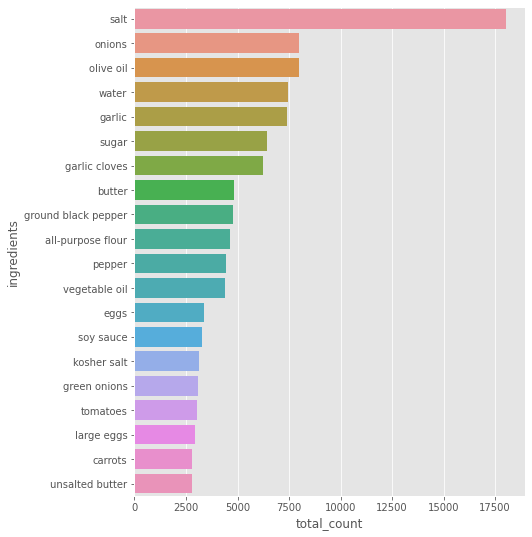

In [20]:
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['ingredients','total_count']
plt.figure(figsize=(7,9))
sns.barplot(x='total_count',y='ingredients',data=temp)

It seems that salt is the most commonly used ingredient

## **Transforming Data**

**The goal is the predict the cuisine - this means a multiclassification problem.** 

In [21]:
data["ingredients_seperated"] = data["ingredients"].apply(lambda x: ' '.join(x))
data.head()

,id,cuisine,ingredients,num_ing,ingredients_seperated
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,black pepper shallots cornflour cayenne pepper...


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["cuisine"].values)
le.classes_

LabelEncoder()

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [23]:
#For keras to be able to work with this, these strings are converted into one-hot encodings:

In [24]:
docs = data["ingredients_seperated"].values
labels_enc = le.transform(data["cuisine"].values)
labels = tf.keras.utils.to_categorical(labels_enc)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**One useful numeric feature that can be used, is the number of ingredients in each recipe**

In [25]:
data['ingredients_len'] = data['ingredients'].apply(len)
doc_lengths = data[['ingredients_len']].values

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

doc_lengths_standardized = ss.fit_transform(doc_lengths)

**Next it is required to transform the ingredients into categories. The order of the ingredients does not matter, so this is an unordered variable length features problem with high cardinality categorical variables.**

Transforming these into categories

In [27]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences

t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

# label encode the documents
encoded_docs = t.texts_to_sequences(docs)

# pad documents to a max length of 40 words
max_length = 40
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

vocab_size

3065

In [28]:
data.drop(data.columns[[3]], axis = 1, inplace = True)
data.head()

,id,cuisine,ingredients,ingredients_seperated,ingredients_len
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,12
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,20


## **Modeling**

In [29]:
def bootstrap_sample_generator(batch_size):
    while True:
        batch_idx = np.random.choice(
            padded_docs.shape[0], batch_size)
        yield ({'cat_inputs': padded_docs[batch_idx],
                'numeric_inputs': doc_lengths[batch_idx]
               }, 
               {'output': labels[batch_idx] })
        

In [30]:
def emb_sz_rule(n_cat): 
    return min(600, round(1.6 * n_cat**0.56))

p = .1

**There are two types of inputs:**

In [31]:
cat_inputs = tf.keras.layers.Input((40,), name='cat_inputs')
numeric_inputs = tf.keras.layers.Input((1,), name='numeric_inputs')

In [32]:
#Add in the embedding layer:

In [33]:
embedding_layer = tf.keras.layers.Embedding(
    vocab_size, 
    emb_sz_rule(vocab_size), 
    input_length=40)
cat_x = embedding_layer(cat_inputs)

global_ave = tf.keras.layers.GlobalAveragePooling1D()(cat_x)
global_max = tf.keras.layers.GlobalMaxPool1D()(cat_x)
x = tf.keras.layers.Concatenate()([global_ave, global_max])

In [34]:

x = tf.keras.layers.RepeatVector(40)(x)
x = tf.keras.layers.Concatenate()([cat_x, x])

x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Conv1D(20, 1)(x)
x = tf.keras.layers.Activation('relu')(x)

global_ave = tf.keras.layers.GlobalAveragePooling1D()(x)
global_max = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Concatenate()([global_ave, global_max])

In [35]:
#Adding on the fixed numeric inputs :

In [36]:
x = tf.keras.layers.Concatenate()([x, numeric_inputs])

In [37]:
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
out = tf.keras.layers.Dense(20, activation='softmax', name='output')(x)

In [38]:
model = tf.keras.models.Model(inputs=[cat_inputs, numeric_inputs], outputs=out)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cat_inputs (InputLayer)        [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 143)      438295      ['cat_inputs[0][0]']             
                                                                                                  
 global_average_pooling1d (Glob  (None, 143)         0           ['embedding[0][0]']              
 alAveragePooling1D)                                                                              
                                                                                                  
 global_max_pooling1d (GlobalMa  (None, 143)         0           ['embedding[0][0]']          

In [41]:
batch_size = 25

model.fit(
    bootstrap_sample_generator(batch_size),
    steps_per_epoch=10_000 // batch_size,
    epochs=50,
    max_queue_size=10,
)

Epoch 1/50
400/400 [==============================] - 8s 19ms/step - loss: 1.4253 - accuracy: 0.5947
Epoch 2/50
400/400 [==============================] - 7s 18ms/step - loss: 1.3386 - accuracy: 0.6211
Epoch 3/50
400/400 [==============================] - 7s 19ms/step - loss: 1.2499 - accuracy: 0.6410
Epoch 4/50
400/400 [==============================] - 7s 18ms/step - loss: 1.1956 - accuracy: 0.6583
Epoch 5/50
400/400 [==============================] - 7s 19ms/step - loss: 1.1574 - accuracy: 0.6691
Epoch 6/50
400/400 [==============================] - 7s 18ms/step - loss: 1.1184 - accuracy: 0.6761
Epoch 7/50
400/400 [==============================] - 7s 18ms/step - loss: 1.0879 - accuracy: 0.6842
Epoch 8/50
400/400 [==============================] - 7s 19ms/step - loss: 1.0893 - accuracy: 0.6890
Epoch 9/50
400/400 [==============================] - 7s 19ms/step - loss: 1.0783 - accuracy: 0.6930
Epoch 10/50
400/400 [==============================] - 8s 19ms/step - loss: 1.0402 - accura

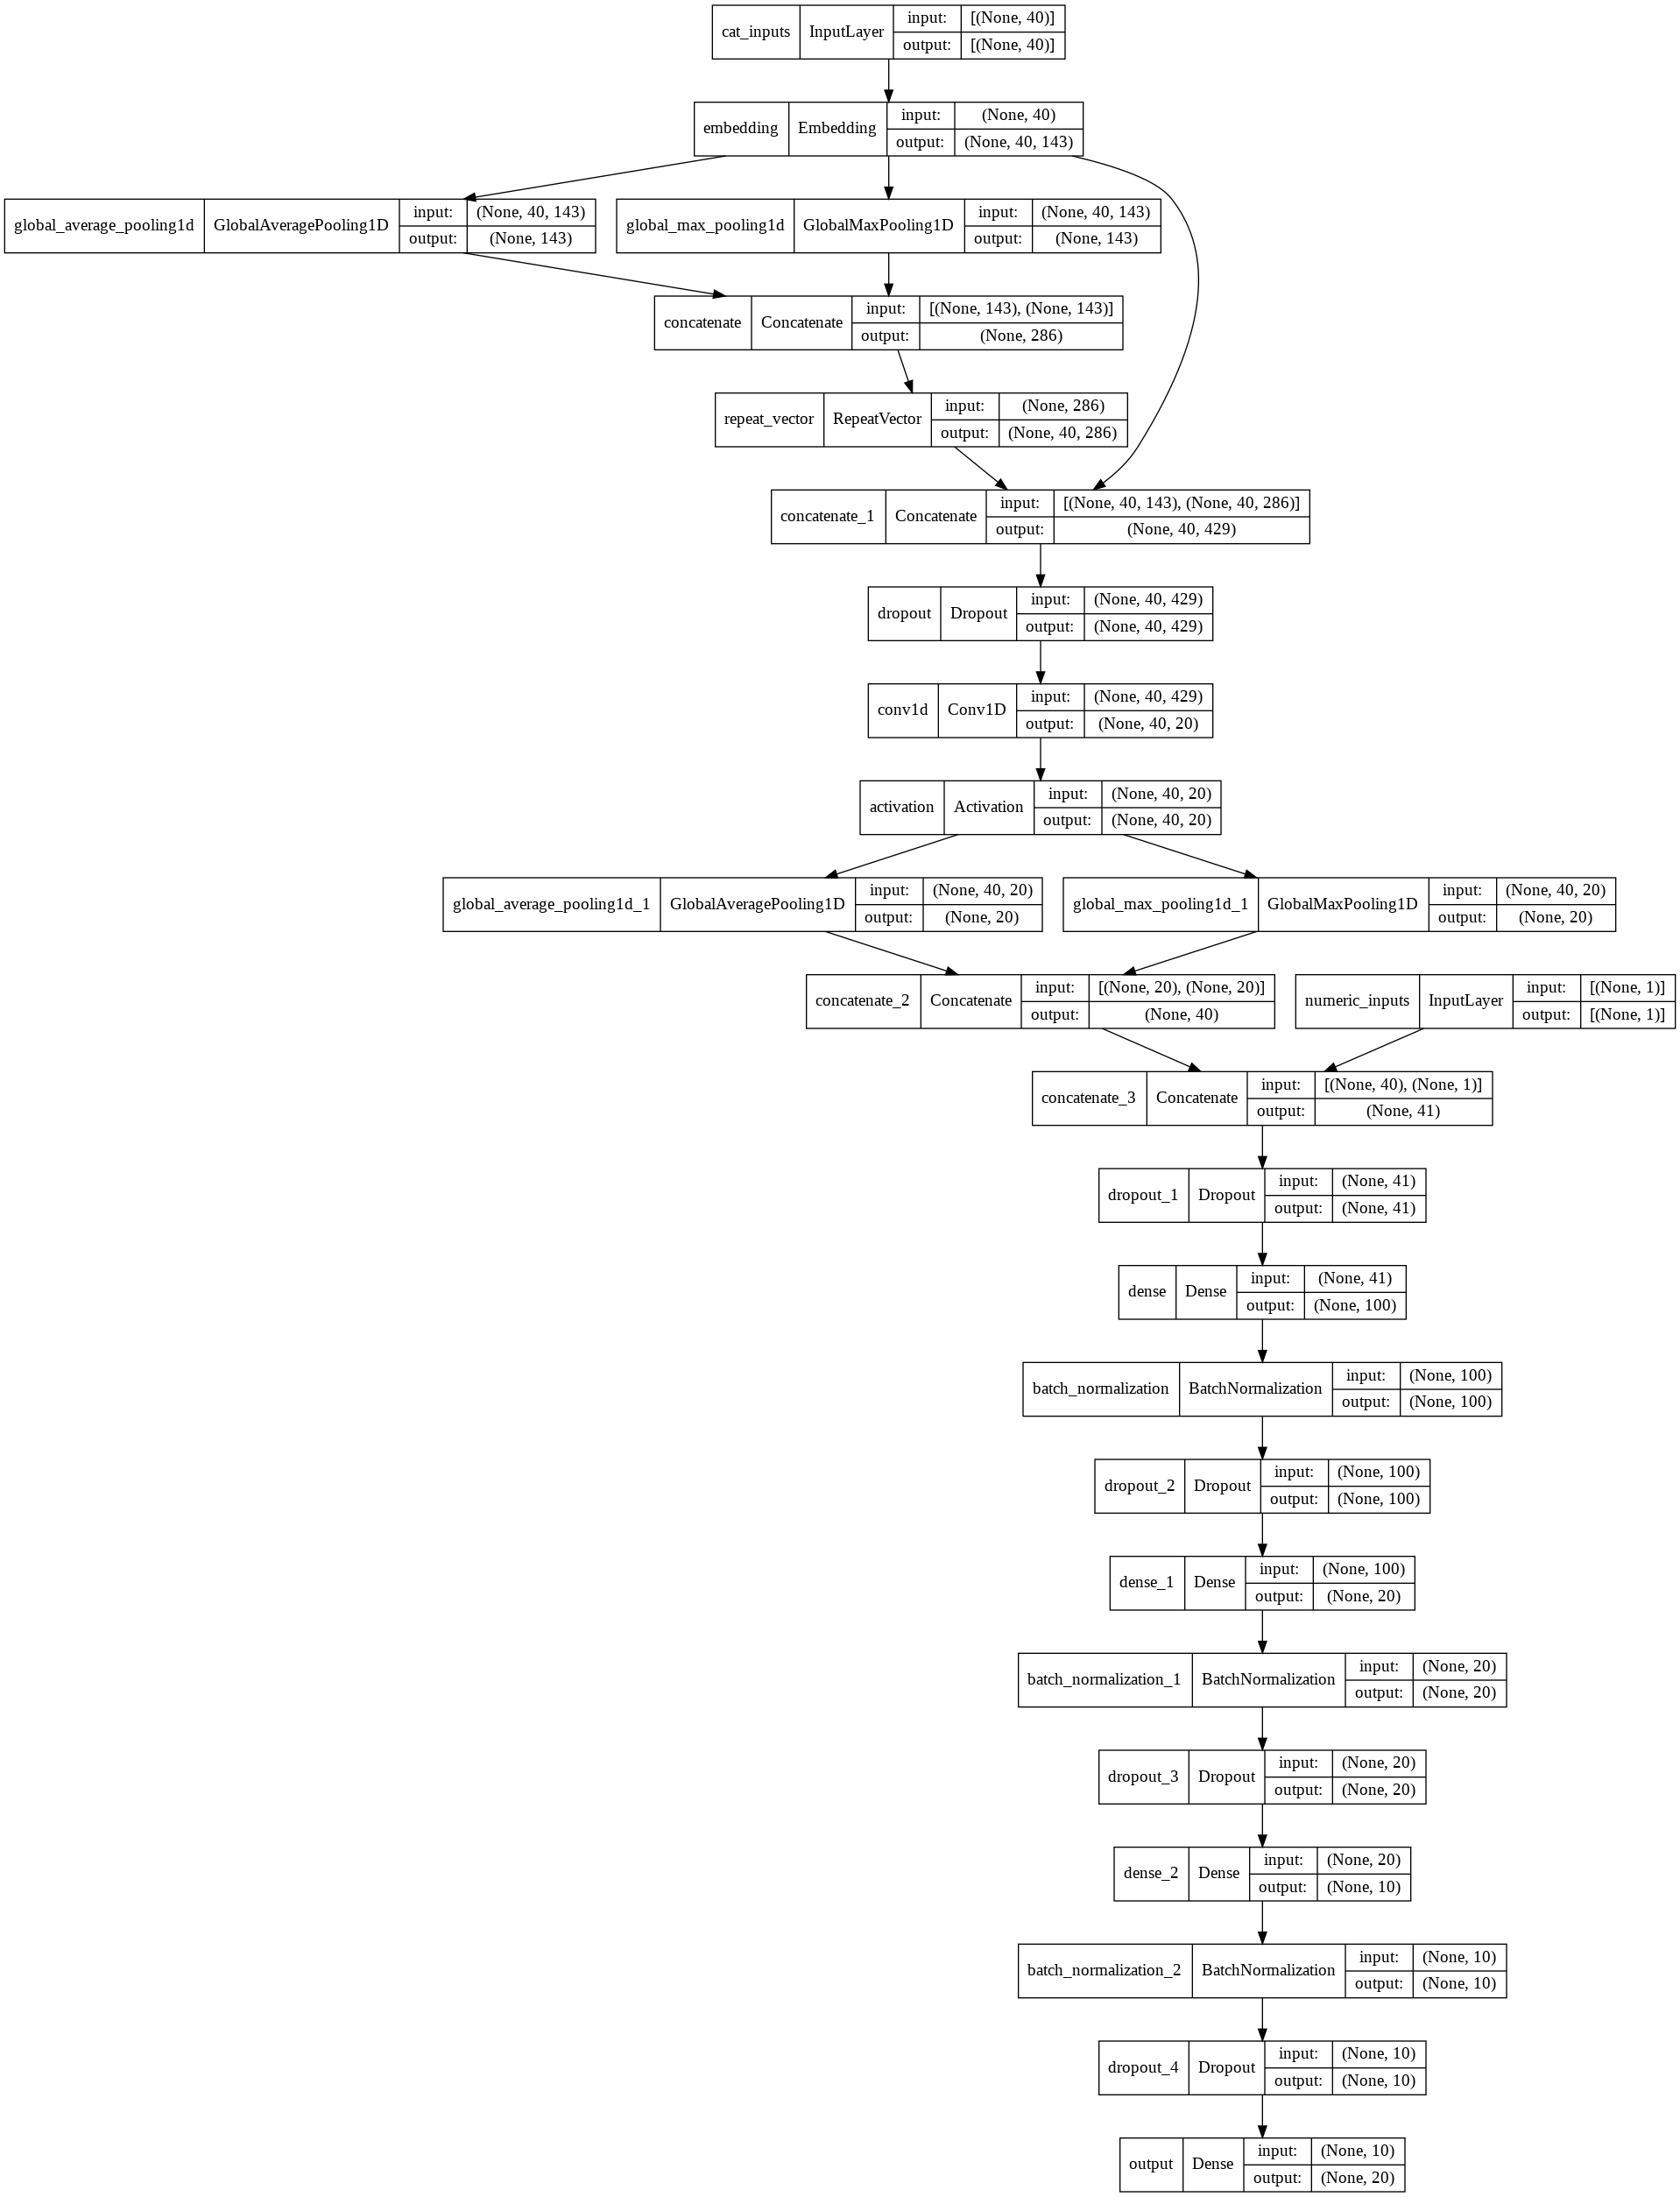

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)